In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [4]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df.drop(['Name' , 'Siblings/Spouses Aboard' , 'Fare'] ,   inplace = True , axis = 1)

In [5]:
X = df.drop(['Pclass'] ,axis = 1)
Y = df['Pclass']

In [6]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [7]:
gau = GaussianNB()
gau.fit(x_train , y_train)

GaussianNB()

In [8]:
pred = gau.predict(x_test)

In [9]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           1       0.52      0.45      0.48        74
           2       0.24      0.10      0.14        42
           3       0.67      0.83      0.74       151

    accuracy                           0.61       267
   macro avg       0.48      0.46      0.45       267
weighted avg       0.56      0.61      0.57       267



In [19]:
cm = confusion_matrix(y_test , pred)

<Axes: >

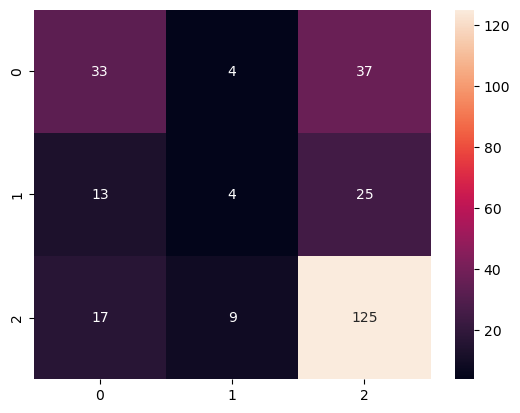

In [22]:
array = pd.DataFrame(cm , range(3) , range(3))
sb.heatmap(cm, annot=True, fmt='d')